**Reccomender system project**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
dataset_path = r'C:\Users\santi\OneDrive\Desktop\progettoMetodi\CDs_and_Vinyl.jsonl'
amazon_sales = pd.read_json(dataset_path, lines=True)


In [2]:
amazon_sales['timestamp'] = pd.to_datetime(amazon_sales['timestamp'])
amazon_sales['year'] = amazon_sales['timestamp'].dt.year
amazon_sales['month'] = amazon_sales['timestamp'].dt.month
amazon_sales['review_length'] = amazon_sales['text'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
amazon_sales['num_images'] = amazon_sales['images'].apply(lambda x: len(x) if isinstance(x, list) else 0)

In [6]:
print(amazon_sales.describe())
print(amazon_sales.isnull().sum())

             rating                      timestamp  helpful_vote  \
count  4.827273e+06                        4827273  4.827273e+06   
mean   4.501898e+00  2013-07-15 16:48:38.224111872  1.908382e+00   
min    1.000000e+00            1997-09-09 03:13:17  0.000000e+00   
25%    4.000000e+00            2009-08-15 00:17:22  0.000000e+00   
50%    5.000000e+00            2014-11-28 18:15:38  0.000000e+00   
75%    5.000000e+00  2017-07-20 23:42:19.375000064  2.000000e+00   
max    5.000000e+00     2023-09-09 15:33:39.315000  2.172000e+03   
std    1.004442e+00                            NaN  6.879886e+00   

               year         month  review_length    num_images  
count  4.827273e+06  4.827273e+06   4.827273e+06  4.827273e+06  
mean   2.013048e+03  6.391952e+00   7.554436e+01  1.426748e-02  
min    1.997000e+03  1.000000e+00   0.000000e+00  0.000000e+00  
25%    2.009000e+03  3.000000e+00   9.000000e+00  0.000000e+00  
50%    2.014000e+03  6.000000e+00   2.900000e+01  0.000000e+00

In [7]:
amazon_sales.info()
amazon_sales.tail()
amazon_sales.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4827273 entries, 0 to 4827272
Data columns (total 14 columns):
 #   Column             Dtype         
---  ------             -----         
 0   rating             int64         
 1   title              object        
 2   text               object        
 3   images             object        
 4   asin               object        
 5   parent_asin        object        
 6   user_id            object        
 7   timestamp          datetime64[ns]
 8   helpful_vote       int64         
 9   verified_purchase  bool          
 10  year               int32         
 11  month              int32         
 12  review_length      int64         
 13  num_images         int64         
dtypes: bool(1), datetime64[ns](1), int32(2), int64(4), object(6)
memory usage: 446.6+ MB


,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,year,month,review_length,num_images
0,5,Five Stars,LOVE IT!,[],B002MW50JA,B002MW50JA,AGKASBHYZPGTEPO6LWZPVJWB2BVA,2016-01-13 02:06:17.000,0,True,2016,1,2,0
1,5,Five Stars,LOVE!!,[],B008XNPN0S,B008XNPN0S,AGKASBHYZPGTEPO6LWZPVJWB2BVA,2016-01-13 02:06:04.000,0,True,2016,1,1,0
2,3,Three Stars,Sad there is not the versions with the real/or...,[],B00IKM5N02,B00IKM5N02,AGKASBHYZPGTEPO6LWZPVJWB2BVA,2016-01-13 01:51:25.000,0,True,2016,1,11,0
3,3,Disappointed,I have listen to The Broadway 1958 Flower Drum...,[],B00006JKCM,B00006JKCM,AEVWAM3YWN5URJVJIZZ6XPD2MKIA,2006-11-20 15:34:24.000,3,True,2006,11,91,0
4,5,Wonderful melding,Simply great album. One of the best. Marvelous...,[],B00013YRQY,B00013YRQY,AFWHJ6O3PV4JC7PVOJH6CPULO2KQ,2020-02-19 05:29:59.946,0,False,2020,2,9,0


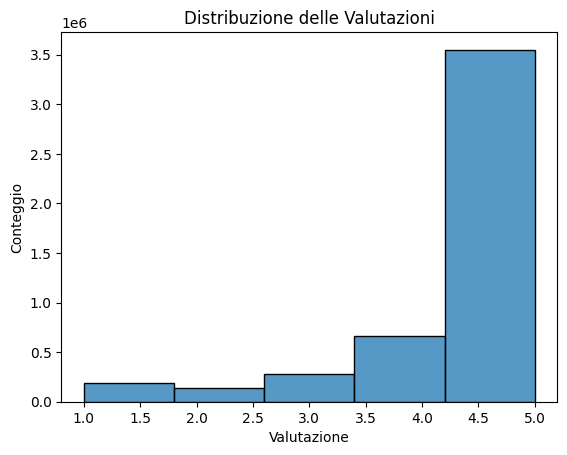

In [8]:
sns.histplot(amazon_sales['rating'], bins=5)
plt.title('Distribuzione delle Valutazioni')
plt.xlabel('Valutazione')
plt.ylabel('Conteggio')
plt.show()

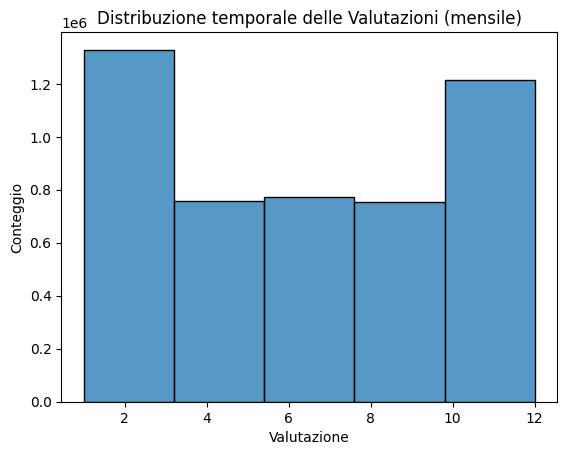

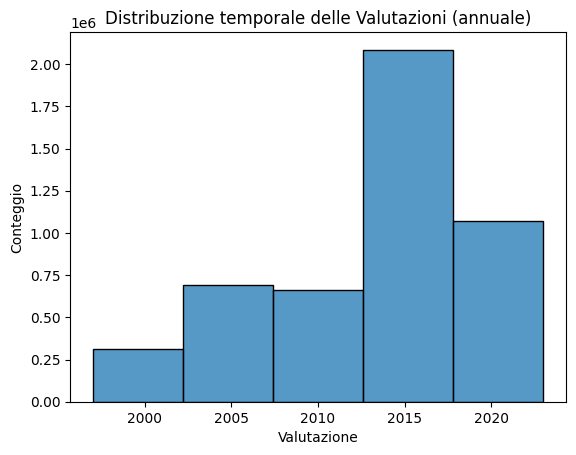

In [9]:
sns.histplot(amazon_sales['month'], bins=5)
plt.title('Distribuzione temporale delle Valutazioni (mensile)')
plt.xlabel('Valutazione')
plt.ylabel('Conteggio')
plt.show()

sns.histplot(amazon_sales['year'], bins=5)
plt.title('Distribuzione temporale delle Valutazioni (annuale)')
plt.xlabel('Valutazione')
plt.ylabel('Conteggio')
plt.show()

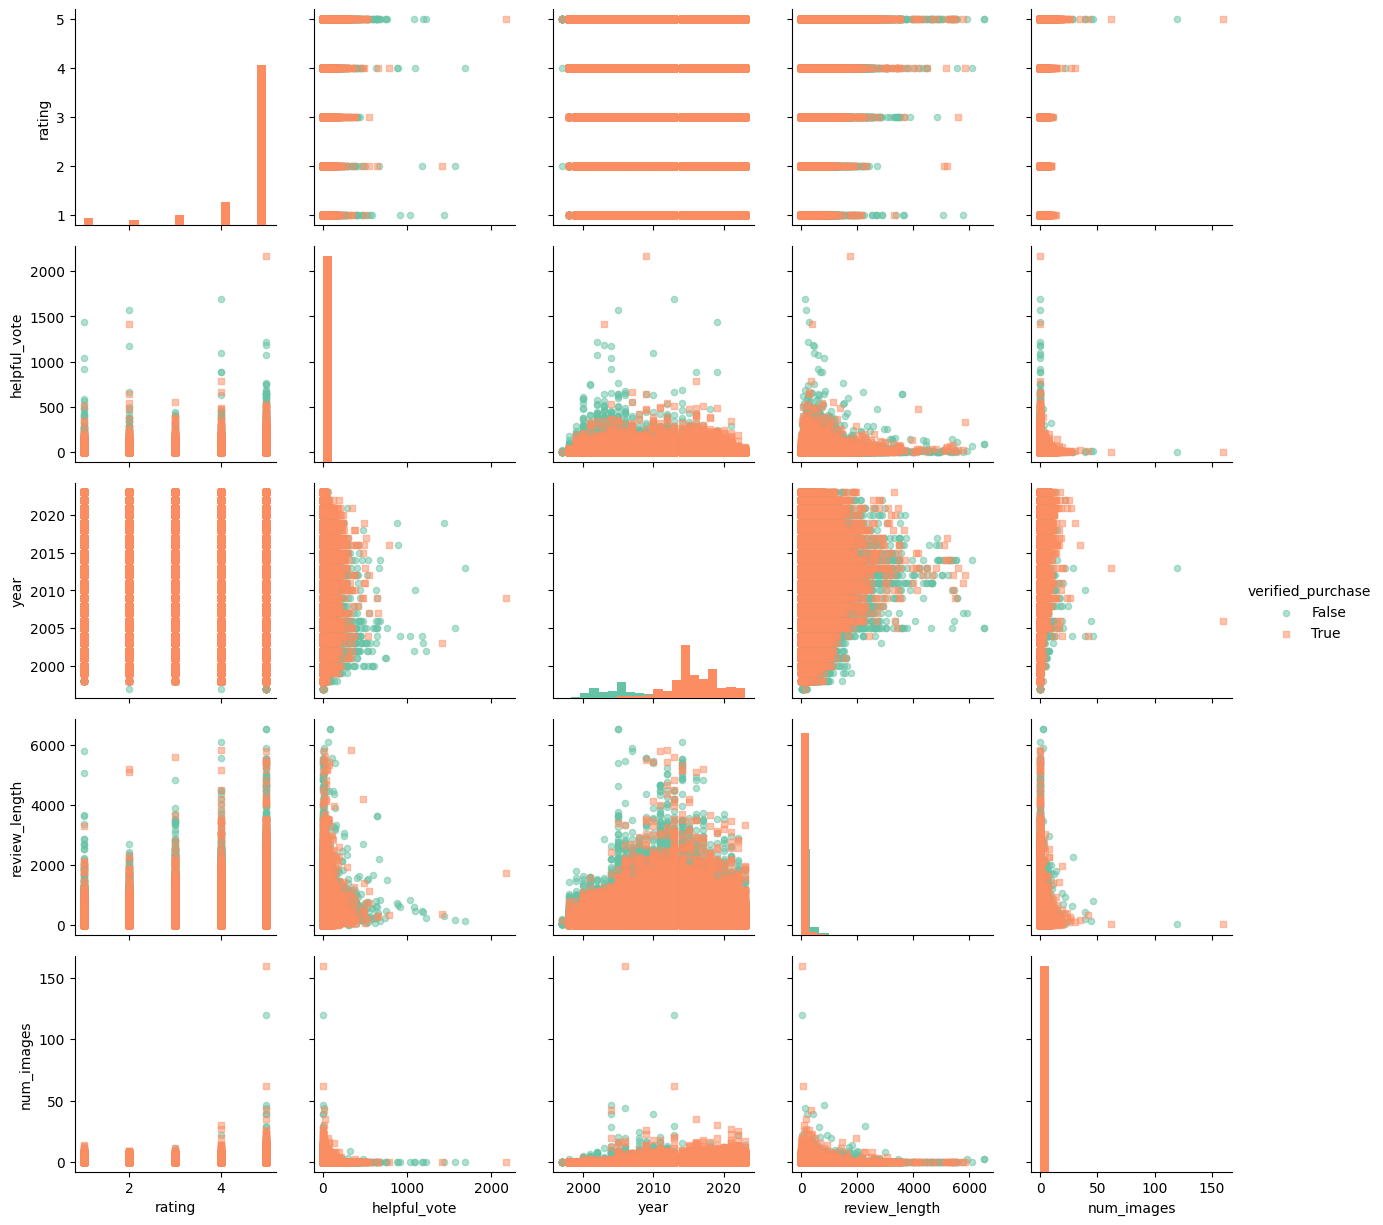

In [10]:

g = sns.PairGrid(amazon_sales[['rating', 'helpful_vote', 'year', 'review_length', 'num_images', 'verified_purchase']], hue='verified_purchase', palette='Set2', hue_kws={"marker": ['o', 's']})
g.map_offdiag(plt.scatter, s=20, alpha=0.5)
g.map_diag(plt.hist, bins=20)
g.add_legend()
plt.show()


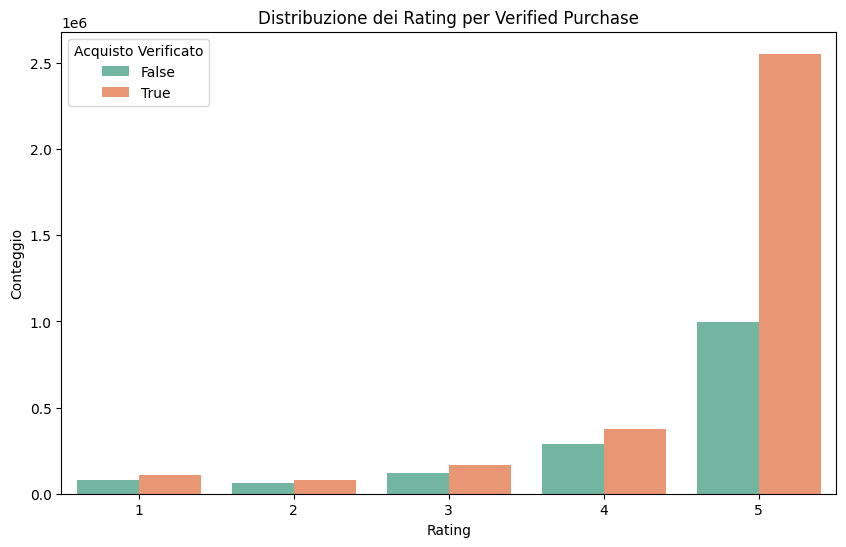

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=amazon_sales, x='rating', hue='verified_purchase', palette='Set2')
plt.title('Distribuzione dei Rating per Verified Purchase')
plt.xlabel('Rating')
plt.ylabel('Conteggio')
plt.legend(title='Acquisto Verificato')
plt.show()

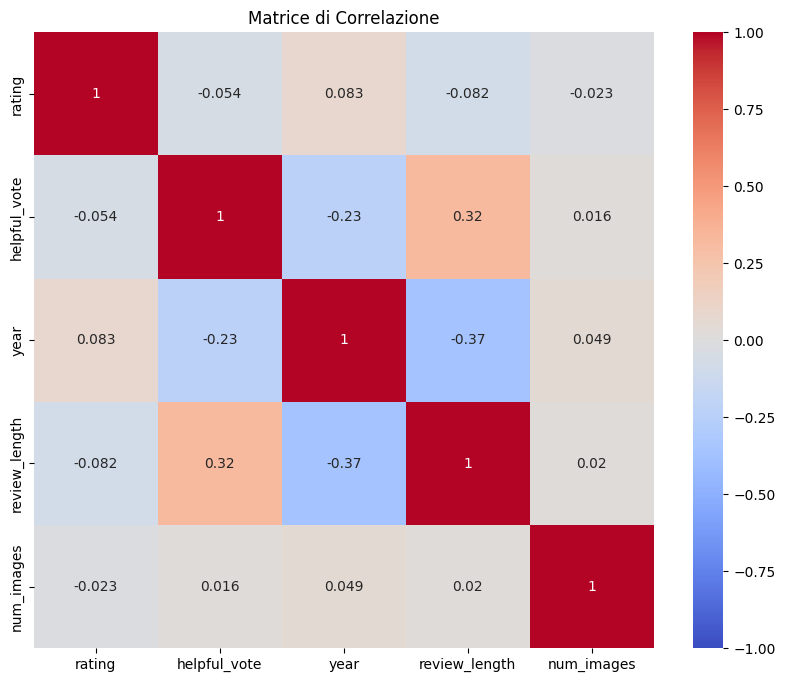

In [12]:

numeric_cols = ['rating', 'helpful_vote', 'year', 'review_length', 'num_images']
correlation_matrix = amazon_sales[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice di Correlazione')
plt.show()

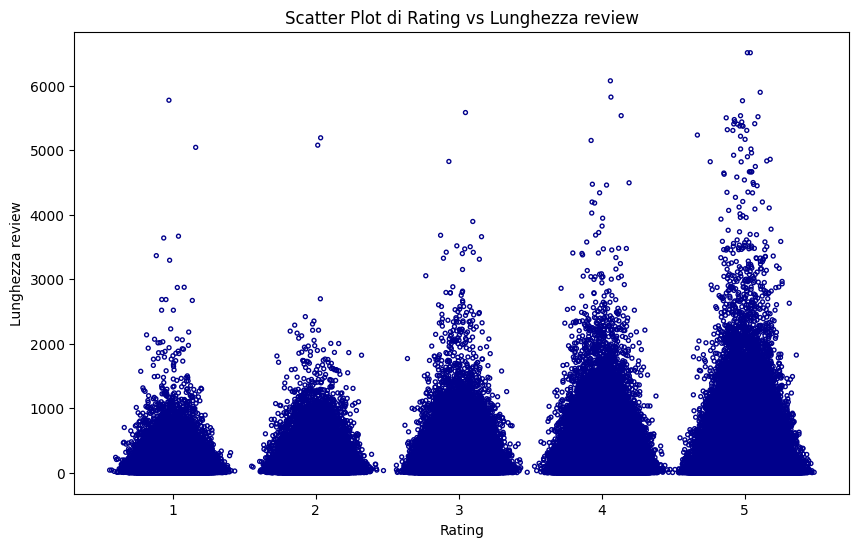

In [13]:
ratings = amazon_sales['rating']
review_lengths = amazon_sales['review_length']
jittered_ratings = ratings + np.random.normal(scale=0.1, size=len(ratings))
jittered_review_lengths = review_lengths + np.random.normal(scale=0.1, size=len(review_lengths))
plt.figure(figsize=(10, 6))
plt.scatter(jittered_ratings, jittered_review_lengths, c='none', edgecolor='darkblue', s=8)
plt.title('Scatter Plot di Rating vs Lunghezza review')
plt.xlabel('Rating')
plt.ylabel('Lunghezza review')
plt.show()


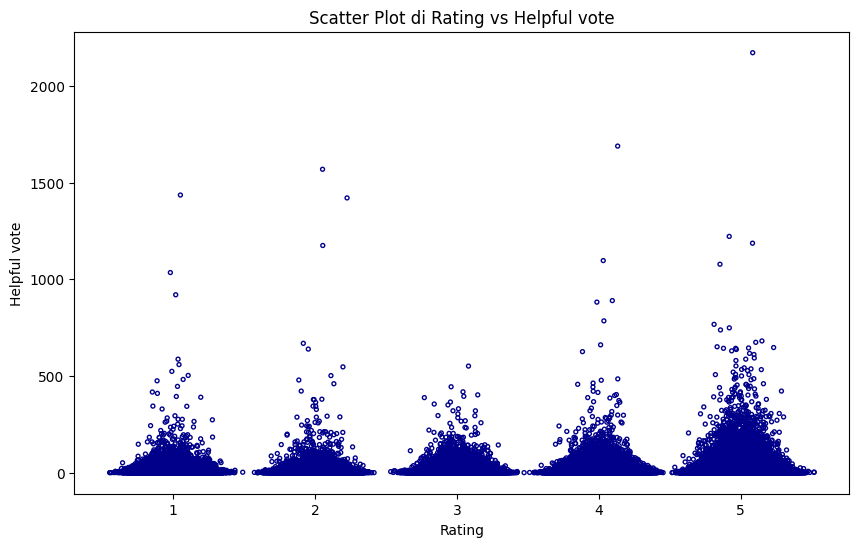

In [14]:
ratings = amazon_sales['rating']
review_lengths = amazon_sales['helpful_vote']
jittered_ratings = ratings + np.random.normal(scale=0.1, size=len(ratings))
jittered_review_lengths = review_lengths + np.random.normal(scale=0.1, size=len(review_lengths))
plt.figure(figsize=(10, 6))
plt.scatter(jittered_ratings, jittered_review_lengths, c='none', edgecolor='darkblue', s=8)
plt.title('Scatter Plot di Rating vs Helpful vote')
plt.xlabel('Rating')
plt.ylabel('Helpful vote')
plt.show()


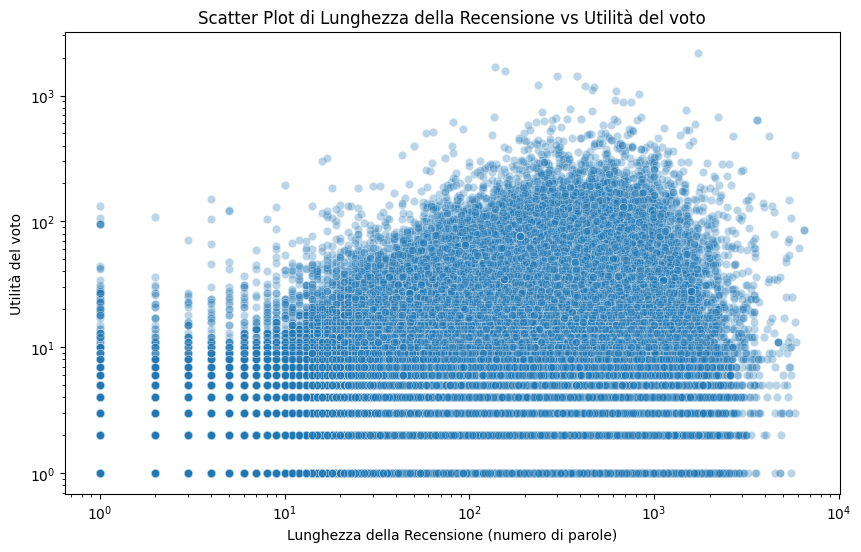

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_length', y='helpful_vote', data=amazon_sales, alpha=0.3)
plt.title('Scatter Plot di Lunghezza della Recensione vs Utilità del voto')
plt.xlabel('Lunghezza della Recensione (numero di parole)')
plt.ylabel('Utilità del voto')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [6]:
!pip install scikit-surprise

In [3]:
import pandas as pd

def filter_data(ratings, user_threshold=10, item_threshold=10):
    while True:

        user_inter_count = ratings.groupby("user_id").count()[["parent_asin"]].reset_index()
        users_id = user_inter_count[user_inter_count["parent_asin"] > user_threshold]["user_id"].tolist()
        ratings = ratings[ratings["user_id"].isin(users_id)]

  
        item_inter_count = ratings.groupby("parent_asin").count()[["user_id"]].reset_index()
        items_id = item_inter_count[item_inter_count["user_id"] > item_threshold]["parent_asin"].tolist()
        ratings = ratings[ratings["parent_asin"].isin(items_id)]


        new_user_inter_count = ratings.groupby("user_id").count()[["parent_asin"]].reset_index()
        new_item_inter_count = ratings.groupby("parent_asin").count()[["user_id"]].reset_index()
        
        if all(new_user_inter_count["parent_asin"] > user_threshold) and all(new_item_inter_count["user_id"] > item_threshold):
            break

    return ratings


ratings = filter_data(amazon_sales)
print("N. Users:", len(ratings["user_id"].unique()))
print("N. Items:", len(ratings["parent_asin"].unique()))
print("N. Ratings:", len(ratings))


N. Users: 16944
N. Items: 15903
N. Ratings: 433645


In [4]:
from surprise import Dataset, Reader
reader = Reader(rating_scale=(1, 5))
dataset_surprise = Dataset.load_from_df(ratings[['user_id', 'parent_asin', 'rating']], reader)
print(amazon_sales[['user_id', 'parent_asin', 'rating']].count())
ratings[['user_id', 'parent_asin', 'rating']]

user_id        4827273
parent_asin    4827273
rating         4827273
dtype: int64


,user_id,parent_asin,rating
46,AHZ6XMOLEWA67S3TX7IWEXXGWSOA,B000F2CAMY,1
47,AHZ6XMOLEWA67S3TX7IWEXXGWSOA,B08FP5TZYZ,5
48,AHZ6XMOLEWA67S3TX7IWEXXGWSOA,B0000E1WKE,5
49,AHZ6XMOLEWA67S3TX7IWEXXGWSOA,B00005R8DV,5
51,AHZ6XMOLEWA67S3TX7IWEXXGWSOA,B0000CFW87,5
...,...,...,...
4820834,AHE4V45MNSR64IMMNE6H4XS7IW7Q,B00000IPAX,4
4820835,AHE4V45MNSR64IMMNE6H4XS7IW7Q,B00005BJMW,2
4820836,AHE4V45MNSR64IMMNE6H4XS7IW7Q,B000099T2L,1
4820837,AHE4V45MNSR64IMMNE6H4XS7IW7Q,B00007FZIJ,3


In [12]:
from surprise.model_selection import cross_validate
from surprise import KNNBasic
mse_over_k, rmse_over_k = [], []
for k in np.arange(5, 41, 2):
    print(f'Trying k={k}...')
    algo = KNNBasic(k=k, verbose=False)
    k_fold_result = cross_validate(algo, dataset_surprise, cv=10,
                                   measures=['mse', 'rmse'],
                                   verbose=False)
    mse_over_k.append(k_fold_result['test_mse'].mean())
    rmse_over_k.append(k_fold_result['test_rmse'].mean())
ks = np.arange(5, 41, 2)
min_rmse_indices = np.argsort(rmse_over_k)[:3]
bestK = [ks[i] for i in min_rmse_indices]
print("I migliori valori di K corrispondenti ai minimi RMSE sono:", bestK)

Trying k=5...
Trying k=7...
Trying k=9...
Trying k=11...
Trying k=13...
Trying k=15...
Trying k=17...
Trying k=19...
Trying k=21...
Trying k=23...
Trying k=25...
Trying k=27...
Trying k=29...
Trying k=31...
Trying k=33...
Trying k=35...
Trying k=37...
Trying k=39...
I migliori valori di K corrispondenti ai minimi RMSE sono: [27, 15, 17]


Best k = 27


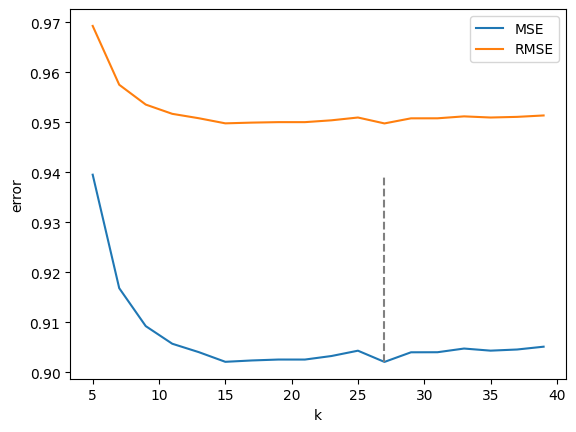

In [13]:
ks = np.arange(5, 41, 2)
print(f'Best k = {ks[np.argmin(rmse_over_k)]}')
plt.plot(ks, mse_over_k, label='MSE')
plt.plot(ks, rmse_over_k, label='RMSE')
plt.vlines(x=ks[np.argmin(rmse_over_k)], ymin=np.min(mse_over_k), ymax=np.max(mse_over_k),
           linestyle='--', color='grey')
plt.xlabel('k')
plt.ylabel('error')
plt.legend();

In [18]:
from surprise.model_selection import GridSearchCV
from surprise import accuracy

param_grid = {
    'k': [27, 15, 17], 
    'sim_options': {
        'name': ['cosine', 'msd', 'pearson'],
        'user_based': [True, False]
    },
}

gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mse'], cv=10, n_jobs=1)
gs.fit(dataset_surprise)

best_mse = gs.best_score['mse']
best_rmse = gs.best_score['rmse']
print(f'Best MSE = {best_mse:.4f}')
print(f'Best RMSE = {best_rmse:.4f}')
print(f'Best configuration: {gs.best_params["rmse"]}')


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing th

In [5]:
from surprise import KNNBasic, Dataset, Reader, accuracy
import numpy as np
from surprise import Dataset, Reader, accuracy
from surprise.model_selection import train_test_split

data = Dataset.load_from_df(ratings[['user_id', 'parent_asin', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.2)


best_k = 27
best_sim_options = {
    'name': 'msd',
    'user_based': False
}

final_model = KNNBasic(k=best_k, sim_options=best_sim_options)
final_model.fit(trainset)
predictions = final_model.test(testset)
rmse = accuracy.rmse(predictions)
mse = accuracy.mse(predictions)
print(f'MSE sul set di test: {mse}')
print(f'RMSE sul set di test: {rmse}')


Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9035
MSE: 0.8162
MSE sul set di test: 0.8162288722106912
RMSE sul set di test: 0.903453857267039


In [20]:
users_id = ratings["user_id"].unique()
items_id = ratings["parent_asin"].unique()
filled_rating_matrix = []
for uid in users_id:
  filled_rating_matrix.append([])
  for iid in items_id:
    res = final_model.predict(uid=uid, iid=iid)
    if res.r_ui is not None:
      filled_rating_matrix[-1].append(0)
    else:
      filled_rating_matrix[-1].append(res.est)

filled_rating_matrix = np.array(filled_rating_matrix)

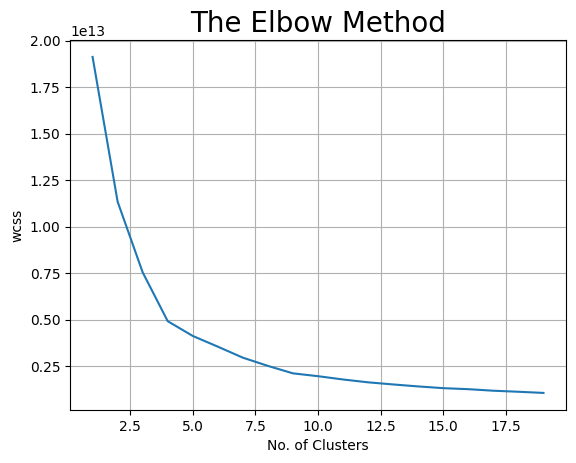

In [27]:

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import MiniBatchKMeans

batch = 1000
features = ratings[['rating', 'user_id', 'parent_asin']]

label_encoder_user = LabelEncoder()
label_encoder_asin = LabelEncoder()
encoded_user_ids = label_encoder_user.fit_transform(features['user_id'])
encoded_parent_asin = label_encoder_asin.fit_transform(features['parent_asin'])

encoded_features = pd.DataFrame({
    'rating': features['rating'],
    'user_id': encoded_user_ids,
    'parent_asin': encoded_parent_asin
})

from sklearn.cluster import MiniBatchKMeans
wcss = []
for i in range(1, 20):
  km = MiniBatchKMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  km.fit(encoded_features)
  wcss.append(km.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.grid(True)
plt.show()

In [28]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
numeric_data =features.select_dtypes(include='number')
optimal_k = 4
kmeans_full_data = MiniBatchKMeans(n_clusters = optimal_k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans_full_data.fit(numeric_data)
full_data_clusters = kmeans_full_data.predict(numeric_data)
silhouette_avg = silhouette_score(numeric_data, full_data_clusters)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.9734388905142608


In [29]:
res_df = pd.DataFrame(filled_rating_matrix)
res_df.columns = items_id
res_df = res_df.set_index(users_id)

def sort_columns(row):
  sorted_columns = sorted(row.items(), key=lambda x: x[1], reverse=True)
  return [col[0] for col in sorted_columns]

rec_lists = pd.DataFrame(list(res_df.apply(sort_columns, axis=1)),
                         index=res_df.index)
rec_lists 

,0,1,2,3,4,5,6,7,8,9,...,15893,15894,15895,15896,15897,15898,15899,15900,15901,15902
AHZ6XMOLEWA67S3TX7IWEXXGWSOA,B000000XCH,B00006WL1Q,B0000046RN,B0007YKL2G,B00CF0ETBE,B00000IYWL,B0882NXWCX,B000002LV3,B0000793V8,B07DKY35GS,...,B00004XR64,B00006ZCFJ,B0000CD5F1,B000BKSITO,B0002JUVYE,B00005RTG8,B000G04RLM,B000IU3YLY,B0009ZE91M,B0009A1APK
AEVQ3KP55X4XECXWMHN6DHIDBYFQ,B00005R8DV,B0018LMKIK,B00006JIA4,B0000CD5FR,B000B8I8JG,B00000K1I5,B00005R8E1,B004KBSQOW,B000002JUC,B000002GYZ,...,B00006ZCFJ,B0000CD5F1,B000BKSITO,B0002XVS1K,B0002JUVYE,B000IU3YLY,B0009ZE91M,B0009A1APK,B000G04RLM,B00005RTG8
AFAIJYOUO3NAWLBDIKTQSC3DASWA,B005FVFWOI,B000001ZS3,B000VFGQUC,B000003NA3,B000005HMC,B000000M0V,B000003L26,B00005KBA0,B0009SOFFY,B0000024SD,...,B00092ZL0I,B0007P3582,B0000CD5F1,B000BKSITO,B0002XVS1K,B00005RTG8,B000G04RLM,B0002JUVYE,B0009ZE91M,B0009A1APK
AFW2PDT3AMT4X3PYQG7FJZH5FXFA,B000002GYZ,B002EE583E,B000F5WNTQ,B000000XCH,B00006WL1Q,B0000046RN,B000002N3H,B000002IJG,B0014DC0G4,B00B3HJLX6,...,B0000AGWGD,B0000CD5F1,B000BKSITO,B002F3BPN6,B000IU3YLY,B0002JUVYE,B00005RTG8,B0009A1APK,B0009ZE91M,B000G04RLM
AHB5CGLYN3Y6NIPHNQLYFJT2W2PQ,B0000065KK,B00006YXCH,B001BOMBSS,B00000F1U5,B0000248L1,B001CT05XA,B0002LI11M,B00000GBZ1,B0000005MT,B000003BGM,...,B000BKSITO,B000063DFT,B000B66PD4,B0002JUVYE,B00005RTG8,B000IU3YLY,B0009A1APK,B0002XVS1K,B0009ZE91M,B000G04RLM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AGDXS6RFX6QBYON4MRQN6ZV3V53Q,B000002GYZ,B000000XCH,B0882NXWCX,B0000793V8,B005APT8A8,B000005HBG,B000006041,B000I5X856,B000OOOJ0E,B0000047CX,...,B0002XVS1K,B0000AVHCQ,B000BKSITO,B0000009RG,B0009ZE91M,B0002JUVYE,B00005RTG8,B0009A1APK,B0000DIJOF,B000G04RLM
AHH3BUIIDFRBKM25VGADGXHLIM3Q,B00005MNP7,B000000XDJ,B09WNGSHJJ,B000002IT2,B000VFGQUC,B0086460KG,B00000JCFW,B0000004V2,B000002H72,B000002JS8,...,B0009ZE91M,B000001Y9X,B0000CD5F1,B000IU3YLY,B00004SCX6,B0002JUVYE,B000BKSITO,B0009A1APK,B00005RTG8,B000G04RLM
AF27OXABUBMLT7Q4VZGYAY6WD35A,B000002GYZ,B000F5WNTQ,B00000348Q,B000000XCH,B00006WL1Q,B0000046RN,B0054YH8DY,B0000025UW,B000002X35,B079NCCK2S,...,B0000CD5F1,B0002XVS1K,B000IU3YLY,B000BKSITO,B0002JUVYE,B00005LD1A,B000G04RLM,B0009A1APK,B00005RTG8,B0009ZE91M
AGXZALWBZGI6ADJMLQMZTOEPFDCQ,B0714CTY2P,B004NTVMLA,B000VKJ6UY,B000002UAU,B000000XDJ,B000002KD7,B00000DQT0,B00004T6QL,B000VFGQUC,B000FJAA0G,...,B00004XR64,B0000CD5F1,B001H9N89S,B0009ZE91M,B00000J81K,B000IU3YLY,B0002JUVYE,B0009A1APK,B00005RTG8,B000G04RLM


In [23]:
from surprise.model_selection import GridSearchCV
from surprise import SVD
from surprise import accuracy

param_grid = {
    'n_factors': [80, 100, 120],
    'n_epochs': [25, 30, 35],
    'lr_all': [0.01, 0.02],
    'reg_all': [0.05, 0.1]
}

gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=10)
gs.fit(dataset_surprise)
best_params = gs.best_params['rmse']
print(f'Migliori parametri: {best_params}')
print(f'Miglior RMSE: {gs.best_score["rmse"]}')

Migliori parametri: {'n_factors': 120, 'n_epochs': 35, 'lr_all': 0.02, 'reg_all': 0.1}
Miglior RMSE: 0.8254433069115421


In [6]:
from surprise import SVD, Dataset, Reader, accuracy
import numpy as np
from surprise import Dataset, Reader, accuracy
from surprise.model_selection import train_test_split

data = Dataset.load_from_df(ratings[['user_id', 'parent_asin', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.2)

n_factors = 100
n_epochs = 35
lr_all = 0.02
reg_all = 0.1

final_modelSVD = SVD(n_factors=n_factors, n_epochs=n_epochs, lr_all=lr_all, reg_all=reg_all)
final_modelSVD.fit(trainset)
predictions = final_modelSVD.test(testset)
rmse = accuracy.rmse(predictions)
mse = accuracy.mse(predictions)
print(f'MSE sul set di test: {mse}')
print(f'RMSE sul set di test: {rmse}')

RMSE: 0.8284
MSE: 0.6862
MSE sul set di test: 0.686241798498792
RMSE sul set di test: 0.8283971260807174


In [25]:
users_id = ratings["user_id"].unique()
items_id = ratings["parent_asin"].unique()
filled_rating_matrix = []
for uid in users_id:
  filled_rating_matrix.append([])
  for iid in items_id:
    res = final_modelSVD.predict(uid=uid, iid=iid)
    if res.r_ui is not None:
      filled_rating_matrix[-1].append(0)
    else:
      filled_rating_matrix[-1].append(res.est)

filled_rating_matrix = np.array(filled_rating_matrix)
filled_rating_matrix

array([[3.27002451, 4.7928319 , 4.67895862, ..., 4.60542624, 4.38913703,
        4.60100325],
       [4.9414268 , 4.63165087, 4.73587402, ..., 4.96993045, 4.85036661,
        5.        ],
       [4.18011173, 3.96466095, 3.75220249, ..., 4.16842451, 3.988767  ,
        4.21811346],
       ...,
       [4.69477446, 4.34670466, 3.9800036 , ..., 4.69507703, 4.47246157,
        5.        ],
       [4.3829067 , 4.34418599, 4.68236044, ..., 4.57659904, 4.31193207,
        4.55722529],
       [4.53557413, 4.00791523, 4.23012071, ..., 4.36941596, 4.22195726,
        4.77070599]])

In [26]:
res_df = pd.DataFrame(filled_rating_matrix)
res_df.columns = items_id
res_df = res_df.set_index(users_id)

def sort_columns(row):
  sorted_columns = sorted(row.items(), key=lambda x: x[1], reverse=True)
  return [col[0] for col in sorted_columns]

rec_lists = pd.DataFrame(list(res_df.apply(sort_columns, axis=1)),
                         index=res_df.index)
rec_lists

,0,1,2,3,4,5,6,7,8,9,...,15893,15894,15895,15896,15897,15898,15899,15900,15901,15902
AHZ6XMOLEWA67S3TX7IWEXXGWSOA,B000000XCH,B00006WL1Q,B0000046RN,B0007YKL2G,B00CF0ETBE,B00000IYWL,B0882NXWCX,B000002LV3,B0000793V8,B07DKY35GS,...,B00004XR64,B00006ZCFJ,B0000CD5F1,B000BKSITO,B0002JUVYE,B00005RTG8,B000G04RLM,B000IU3YLY,B0009ZE91M,B0009A1APK
AEVQ3KP55X4XECXWMHN6DHIDBYFQ,B00005R8DV,B0018LMKIK,B00006JIA4,B0000CD5FR,B000B8I8JG,B00000K1I5,B00005R8E1,B004KBSQOW,B000002JUC,B000002GYZ,...,B00006ZCFJ,B0000CD5F1,B000BKSITO,B0002XVS1K,B0002JUVYE,B000IU3YLY,B0009ZE91M,B0009A1APK,B000G04RLM,B00005RTG8
AFAIJYOUO3NAWLBDIKTQSC3DASWA,B005FVFWOI,B000001ZS3,B000VFGQUC,B000003NA3,B000005HMC,B000000M0V,B000003L26,B00005KBA0,B0009SOFFY,B0000024SD,...,B00092ZL0I,B0007P3582,B0000CD5F1,B000BKSITO,B0002XVS1K,B00005RTG8,B000G04RLM,B0002JUVYE,B0009ZE91M,B0009A1APK
AFW2PDT3AMT4X3PYQG7FJZH5FXFA,B000002GYZ,B002EE583E,B000F5WNTQ,B000000XCH,B00006WL1Q,B0000046RN,B000002N3H,B000002IJG,B0014DC0G4,B00B3HJLX6,...,B0000AGWGD,B0000CD5F1,B000BKSITO,B002F3BPN6,B000IU3YLY,B0002JUVYE,B00005RTG8,B0009A1APK,B0009ZE91M,B000G04RLM
AHB5CGLYN3Y6NIPHNQLYFJT2W2PQ,B0000065KK,B00006YXCH,B001BOMBSS,B00000F1U5,B0000248L1,B001CT05XA,B0002LI11M,B00000GBZ1,B0000005MT,B000003BGM,...,B000BKSITO,B000063DFT,B000B66PD4,B0002JUVYE,B00005RTG8,B000IU3YLY,B0009A1APK,B0002XVS1K,B0009ZE91M,B000G04RLM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AGDXS6RFX6QBYON4MRQN6ZV3V53Q,B000002GYZ,B000000XCH,B0882NXWCX,B0000793V8,B005APT8A8,B000005HBG,B000006041,B000I5X856,B000OOOJ0E,B0000047CX,...,B0002XVS1K,B0000AVHCQ,B000BKSITO,B0000009RG,B0009ZE91M,B0002JUVYE,B00005RTG8,B0009A1APK,B0000DIJOF,B000G04RLM
AHH3BUIIDFRBKM25VGADGXHLIM3Q,B00005MNP7,B000000XDJ,B09WNGSHJJ,B000002IT2,B000VFGQUC,B0086460KG,B00000JCFW,B0000004V2,B000002H72,B000002JS8,...,B0009ZE91M,B000001Y9X,B0000CD5F1,B000IU3YLY,B00004SCX6,B0002JUVYE,B000BKSITO,B0009A1APK,B00005RTG8,B000G04RLM
AF27OXABUBMLT7Q4VZGYAY6WD35A,B000002GYZ,B000F5WNTQ,B00000348Q,B000000XCH,B00006WL1Q,B0000046RN,B0054YH8DY,B0000025UW,B000002X35,B079NCCK2S,...,B0000CD5F1,B0002XVS1K,B000IU3YLY,B000BKSITO,B0002JUVYE,B00005LD1A,B000G04RLM,B0009A1APK,B00005RTG8,B0009ZE91M
AGXZALWBZGI6ADJMLQMZTOEPFDCQ,B0714CTY2P,B004NTVMLA,B000VKJ6UY,B000002UAU,B000000XDJ,B000002KD7,B00000DQT0,B00004T6QL,B000VFGQUC,B000FJAA0G,...,B00004XR64,B0000CD5F1,B001H9N89S,B0009ZE91M,B00000J81K,B000IU3YLY,B0002JUVYE,B0009A1APK,B00005RTG8,B000G04RLM


In [4]:

dataset_path = r'C:\Users\santi\OneDrive\Desktop\progettoMetodi\meta_CDs_and_Vinyl.jsonl'
amazon_items = pd.read_json(dataset_path, lines=True)
amazon_items

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
0,Digital Music,Release Some Tension,4.6,112,[],[Swv ~ Release Some Tension],12.05,[{'thumb': 'https://m.media-amazon.com/images/...,[],SWV Format: Audio CD,"[CDs & Vinyl, Dance & Electronic, House]","{'Is Discontinued By Manufacturer': 'No', 'Pro...",B000002X4C,NaN,NaN,NaN
1,Digital Music,Rio Angie,5.0,1,[],"[Shrimp City Slim (aka Gary Erwin, b. 1953, Ch...",14.98,[{'thumb': 'https://m.media-amazon.com/images/...,[],Shrimp City Slim (Artist) Format: Audio CD,"[CDs & Vinyl, Jazz, Avant Garde & Free Jazz]",{'Product Dimensions': '5.6 x 0.4 x 4.9 inches...,B00902T10Y,NaN,NaN,NaN
2,Digital Music,Lost in Love,5.0,9,[],[],24.99,[{'thumb': 'https://m.media-amazon.com/images/...,[],Nastyboy Klick Format: Audio CD,"[CDs & Vinyl, Rap & Hip-Hop, Gangsta & Hardcore]",{'Package Dimensions': '4.7 x 4.6 x 0.1 inches...,B00000DALY,NaN,NaN,NaN
3,Digital Music,Somewhere in Time,4.8,1186,[],[The 1980 soundtrack to the now classic motion...,11.55,[{'thumb': 'https://m.media-amazon.com/images/...,[],"John Barry (Composer), Barry, John (Comp...","[CDs & Vinyl, Soundtracks, Movie Scores]","{'Is Discontinued By Manufacturer': 'No', 'Lan...",B0000086D1,NaN,NaN,NaN
4,Digital Music,Kimmon Waldruff,5.0,1,[],[Solo acoustic fingerstyle guitar.],14.07,[{'thumb': 'https://m.media-amazon.com/images/...,[],Kimmon Waldruff (Artist) Format: Audio CD,"[CDs & Vinyl, Folk]","{'Is Discontinued By Manufacturer': 'No', 'Pro...",B000S6W7KC,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701954,Digital Music,Forever Gold: British Invasion,3.0,1,[],[British Invasion ~ Forever Gold: British Inva...,11.64,[{'thumb': 'https://m.media-amazon.com/images/...,[],Forever Gold (Series) Format: Audio CD,"[CDs & Vinyl, International Music, Europe, Bri...","{'Is Discontinued By Manufacturer': 'No', 'Pac...",B00005AVHN,NaN,NaN,NaN
701955,Digital Music,"Joan Hammond, Historical Recordings from 1941-49",5.0,1,[],[],None,[{'thumb': 'https://m.media-amazon.com/images/...,[],UNKNOWN (Artist) Format: Audio CD,"[CDs & Vinyl, Classical]",{},B000T001IM,NaN,NaN,NaN
701956,Digital Music,Come Alive,4.5,4,[],[The Second Full Length Album from the Winner ...,None,[{'thumb': 'https://m.media-amazon.com/images/...,[],Heinz Winckler Format: Audio CD,"[CDs & Vinyl, International Music, Africa, Sou...",{'Package Dimensions': '5.55 x 4.97 x 0.54 inc...,B00069I6RO,NaN,NaN,NaN
701957,Digital Music,Long Day in the Milky Way,4.4,16,[],[2020 release from the folk/Americana singer/s...,12.98,[{'thumb': 'https://m.media-amazon.com/images/...,[],Kris Delmhorst (Artist) Format: Audio CD,"[CDs & Vinyl, Folk]",{'Product Dimensions': '5.5 x 4.9 x 0.4 inches...,B08BF2PH1X,NaN,NaN,NaN


In [6]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\santi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\santi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\santi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.lower() not in stop_words and word.isalpha()]
    return ' '.join(tokens)
    
amazon_items['description'] = amazon_items['description'].fillna('')
amazon_items['description'] = amazon_items['description'].astype(str)

amazon_items['processed_title'] = amazon_items['title'].apply(preprocess_text)
amazon_items['processed_description'] = amazon_items['description'].apply(preprocess_text)
print(amazon_items[['processed_title', 'processed_description']].head())

   processed_title                              processed_description
0  release tension                                    release tension
1        rio angie  shrimp city slim aka gary erwin b chicago long...
2        lost love                                                   
3   somewhere time  soundtrack classic motion picture starring lat...
4  kimmon waldruff                        acoustic fingerstyle guitar


In [7]:
filtered_amazon_items = amazon_items[amazon_items["parent_asin"].isin(ratings["parent_asin"])].reset_index(drop=True)
print("Total items: " + str(len(amazon_items)) + ", Filtered items: " + str(len(filtered_amazon_items)))

Total items: 701959, Filtered items: 15903


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
bow_model = vectorizer.fit_transform(filtered_amazon_items['processed_description'])
bow_dataset = pd.DataFrame(bow_model.toarray(), columns=vectorizer.get_feature_names_out())
bow_dataset["parent_asin"] = filtered_amazon_items["parent_asin"]
bow_dataset

,aaa,aaaah,aachen,aaf,aaliyah,aames,aaron,ab,abacab,aback,...,émigrés,évaluer,éxitos,íllgresi,ör,öyster,últimos,üaut,über,parent_asin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B000002X4C
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B0002ADY0Q
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B00KE3B7SC
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B000000H57
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B000R7I3FA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15898,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B0009JK0XY
15899,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B0009NR7YK
15900,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B00026WU82
15901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B003097B64


In [10]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('sentence-transformers/average_word_embeddings_komninos')
embeddings = model.encode(filtered_amazon_items['processed_description'])
embeddings_dataset = pd.DataFrame(embeddings)
embeddings_dataset["parent_asin"] = filtered_amazon_items["parent_asin"]
embeddings_dataset

C:\Users\santi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,parent_asin
0,0.376667,-0.240261,0.168186,0.071327,-0.193679,0.244111,-0.195401,-0.278250,-0.333683,0.188953,...,-0.164099,-0.068406,0.012150,-0.297209,0.445731,0.666840,0.002297,0.186354,-0.134059,B000002X4C
1,0.218384,0.044372,0.110889,-0.100399,-0.151894,0.086375,-0.124995,-0.058304,-0.192454,0.121374,...,0.004997,-0.187514,0.079925,-0.162875,0.298790,0.457626,0.133135,0.522413,-0.192793,B0002ADY0Q
2,0.213495,0.056054,0.012911,-0.033832,0.033396,-0.023286,-0.198576,-0.073960,-0.119037,0.137012,...,-0.031984,-0.064959,-0.026999,-0.060447,0.249051,0.523019,0.132707,0.278454,-0.295034,B00KE3B7SC
3,0.079970,0.024426,0.079674,-0.029951,-0.159861,0.062422,-0.179397,-0.120607,-0.153526,0.186836,...,-0.014667,-0.136893,0.005965,-0.092427,0.387112,0.620391,0.118042,0.459902,-0.231898,B000000H57
4,0.062232,0.076767,0.041308,-0.012437,-0.159351,0.044738,-0.184855,-0.069320,-0.168199,0.142204,...,-0.007671,-0.187883,0.065462,-0.106061,0.304100,0.492566,0.122572,0.376302,-0.273442,B000R7I3FA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15898,0.096333,0.072506,0.046591,-0.009555,-0.152288,0.035958,-0.140665,-0.034602,-0.199579,0.166849,...,0.007903,-0.143102,-0.005368,-0.111682,0.307279,0.466532,0.105910,0.286593,-0.310443,B0009JK0XY
15899,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,B0009NR7YK
15900,0.104837,0.082602,0.101372,-0.034208,-0.216469,0.098428,-0.231500,-0.042215,-0.129367,0.087681,...,-0.022346,-0.181646,0.053668,-0.141349,0.232995,0.511205,0.149472,0.368481,-0.283779,B00026WU82
15901,0.225839,0.127714,0.027265,-0.017645,-0.071721,0.119368,-0.185136,-0.105418,-0.253481,0.141724,...,-0.110875,-0.060810,0.070991,-0.156214,0.213669,0.391559,0.021746,0.379576,-0.237624,B003097B64


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
mse_users = []
for user_id in ratings['user_id'].unique():
    user_ratings = ratings[ratings['user_id'] == user_id]
    rated_items = bow_dataset[bow_dataset['parent_asin'].isin(user_ratings['parent_asin'])]
    dataset = pd.merge(rated_items, user_ratings, on="parent_asin")
    dataset = dataset.drop(columns=["parent_asin", "user_id", "text_y", "title_y", "images", "asin_y", "timestamp"])
 
    try:
        X_train, X_test, y_train, y_test = train_test_split(
            dataset.drop(columns="rating_y"),
            dataset['rating_y'],
            test_size=0.20,
            random_state=0
        )
        

        neigh_reg = KNeighborsRegressor(n_neighbors=min(40, len(X_train)),
                                        metric="cosine")
        y_pred = neigh_reg.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mse_users.append(mse)
        
    except Exception as e:
        print(f"Error processing user {user_id}: {str(e)}")
        continue

print(f"Average MSE over users: {np.mean(mse_users):.2f}")
print(f"Average RMSE over users: {np.sqrt(np.mean(mse_users)):.2f}")


Average MSE over users: 0.79
Average RMSE over users: 0.89


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
mse_users = []
for user_id in ratings['user_id'].unique():
    user_ratings = ratings[ratings['user_id'] == user_id]
    rated_items = embeddings_dataset[embeddings_dataset['parent_asin'].isin(user_ratings['parent_asin'])]
    dataset_rec = pd.merge(rated_items, user_ratings, on="parent_asin")
    dataset_rec = dataset_rec.drop(columns=["parent_asin", "user_id", "text", "title", "images", "asin", "timestamp"])
    
    try:
        X_train, X_test, y_train, y_test = train_test_split(dataset_rec.drop(columns="rating"),
                                                            dataset_rec['rating'],
                                                            test_size=0.20,
                                                            random_state=0)
        
        X_train.columns = X_train.columns.astype(str)
        X_test.columns = X_test.columns.astype(str)
        neigh_reg = KNeighborsRegressor(n_neighbors=min(40, len(X_train)),
                                        metric="cosine")
        neigh_reg.fit(X_train, y_train)
        y_pred = neigh_reg.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mse_users.append(mse)
        
    except Exception as e:
       print(f"Error processing user {user_id}: {str(e)}")
    continue
print(f"Average MSE over users: {np.mean(mse_users):.2f}")
print(f"Average RMSE over users: {np.sqrt(np.mean(mse_users)):.2f}")

Average MSE over users: 0.79
Average RMSE over users: 0.89
